# <span style = "color:brown"> Image Segmentation and the Watershed Algorithm</span>

### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Read 'coins_image.jpg' with cv2

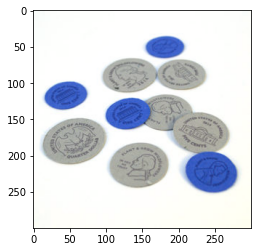

In [2]:
img = cv2.imread('coins_image.jpg')
plt.imshow(img)

### Create a function to display the image in a larger size

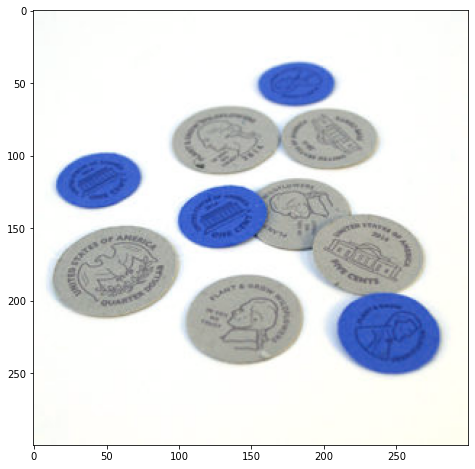

In [3]:
def display(img, cmap = None):
    plt.figure(figsize = (8,8))
    plt.imshow(img, cmap = cmap)
display(img)

### Apply Median Blur

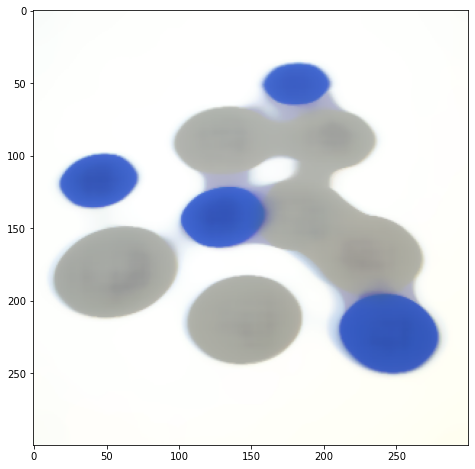

In [4]:
blur_img = cv2.medianBlur(img, 25)
display(blur_img)


### Convert to Grayscale

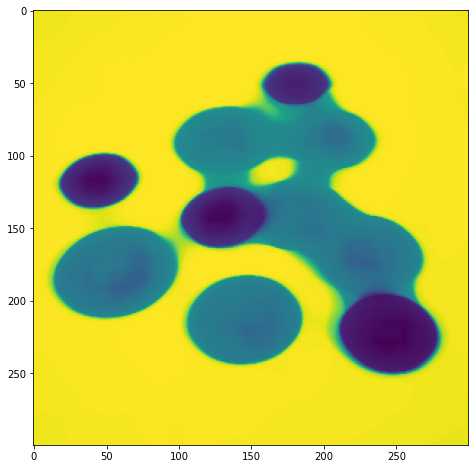

In [5]:
gray_img = cv2.cvtColor(blur_img, cv2.COLOR_BGR2GRAY)
display(gray_img )

### Apply threshold (Inverse binary with OTSU)

In [6]:
ret, thresh = cv2.threshold(gray_img, 180 , 255, cv2.THRESH_BINARY_INV)


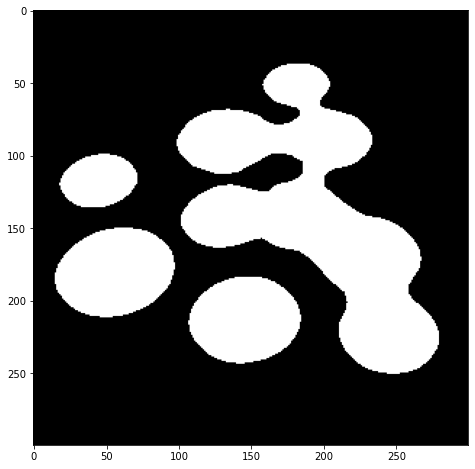

In [7]:
display(thresh, cmap ='gray')

### Remove noise with the help of a morphological operator

In [8]:
kernal = np.ones((3,3))

In [9]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernal, iterations = 2)

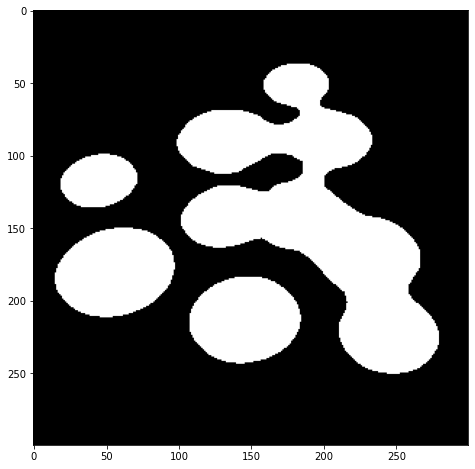

In [10]:
display(opening, cmap = 'gray')

### Grab background that you are sure of

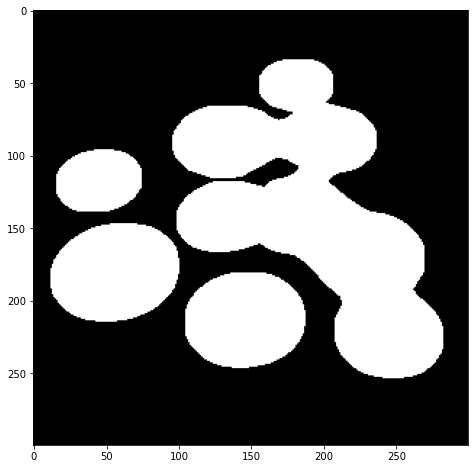

In [11]:
sure_bg = cv2.dilate(opening,kernal, iterations = 3)
display(sure_bg, cmap = 'gray')


### Find sure Foreground

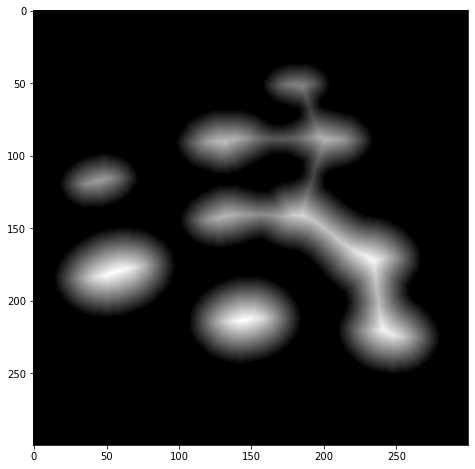

In [12]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
display(dist_transform, cmap = 'gray')

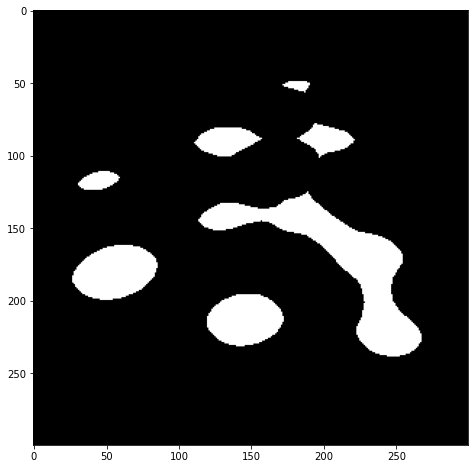

In [13]:
ret, sure_fg = cv2.threshold(dist_transform, 0.4* dist_transform.max(), 255 , 0)
display(sure_fg , cmap = 'gray')

### Find unknown region

In [14]:
sure_fg = np.uint8(sure_fg)

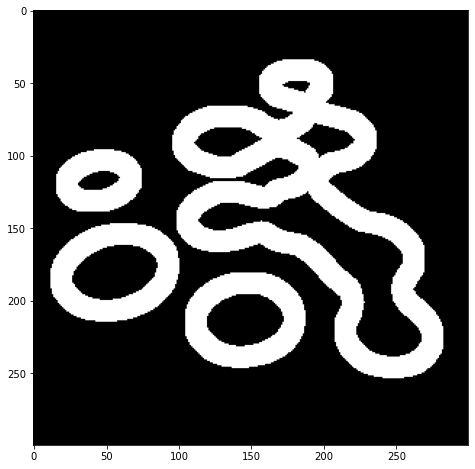

In [15]:
unknown = cv2.subtract(sure_bg, sure_fg)
display(unknown, cmap = 'gray')

### Label Markers of sure Foreground

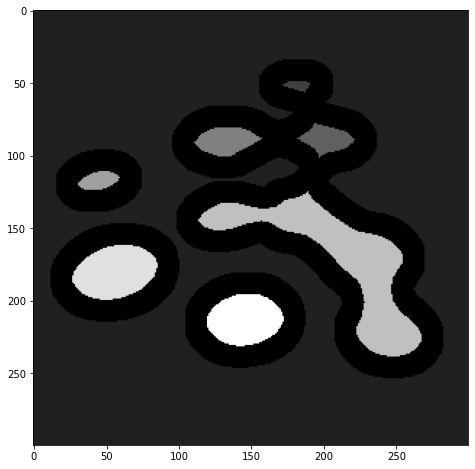

In [16]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
display(markers, cmap = 'gray')

### Apply watersheld alogirithm to find markers

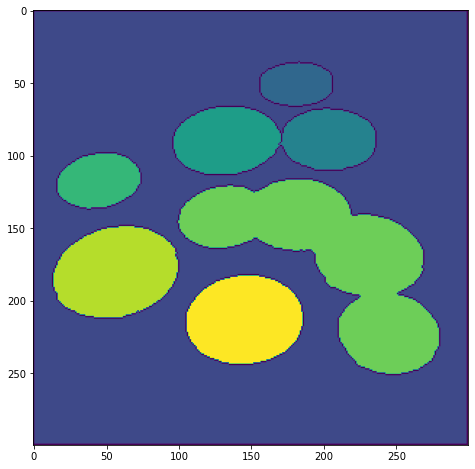

In [17]:
markers = cv2.watershed(img, markers)
display(markers)

### Read the image again

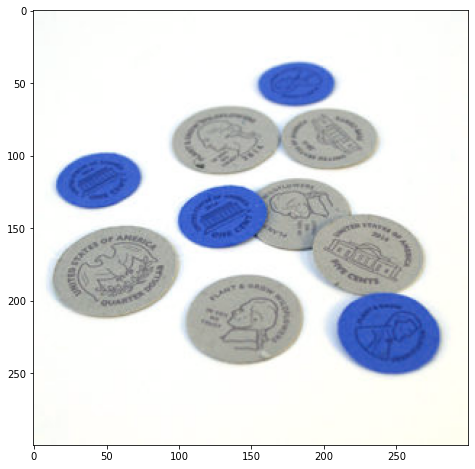

In [18]:
img = cv2.imread('coins_image.jpg')

def display(img, cmap = None):
    plt.figure(figsize = (8,8))
    plt.imshow(img, cmap = cmap)
display(img)

### Find contours on Markers

In [19]:
contours, heirarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

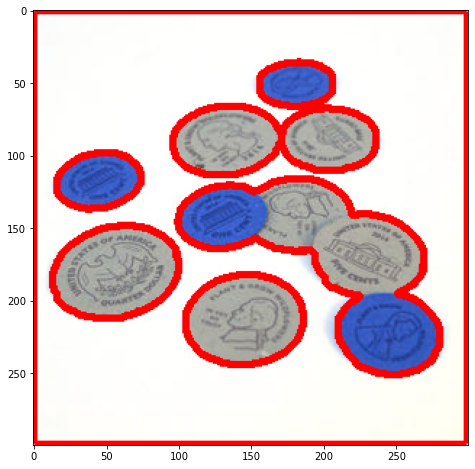

In [20]:
for i in range(len(contours)):
    if heirarchy[0][i][3]:
        cv2.drawContours(img, contours, i, (255,0,0), 2)
display(img)

***